In [2]:
# Importamos nuestra librerías básicas
import numpy as np
import os
import itertools

from sklearn.datasets import make_classification, make_circles
from sklearn.datasets import fetch_mldata
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns

# Este paso es para que los resultados en vuestros notebooks sean iguales a lo de este
np.random.seed(42)


# Aprendizaje supervisado - SVM

En este notebook volveremos a clasificar el MNIST, pero ahora utilizando el clasificador basado en Support Vector Machine (SVM)

- Separación lineal, como la regresión logística...
- ... pero podemos definir la distancia entre los ejemplos y la separación


In [20]:
# Para empezar creamos un dataset ejemplo con sklearn
data = make_classification(n_samples=30, n_features=2, n_informative=2, n_redundant=0,
                           weights=[.6, .4], random_state=42)
# Separo entre *features* y el objetivo
scale = StandardScaler().fit(data[0])
features = scale.transform(data[0])
target = data[1]
# Regresión
log_reg = LogisticRegression().fit(features, target)
# Dibujo las muestras
nok = features[target==0]
ok = features[target==1]
plt.figure(figsize=(7,7))
plt.xlabel("Primera Prueba")
plt.ylabel("Segunda Prueba")
plt.scatter(nok[:,0], nok[:,1], color="red", alpha=0.5)
plt.scatter(ok[:,0], ok[:,1], color="blue", alpha=0.5)
lin = np.array([-2,2])
w0 = log_reg.intercept_
w1,w2 = log_reg.coef_[0]
plt.plot(lin,(-w0-w1*lin)/w2,"k-")


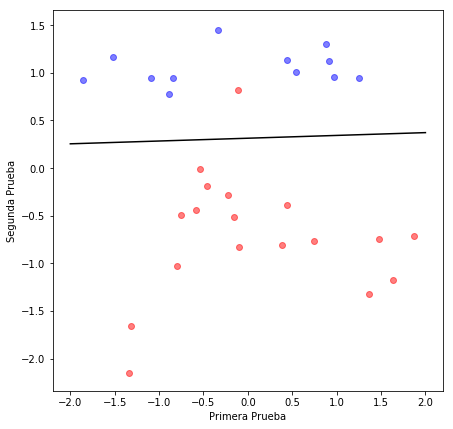

In [21]:
plt.show()

# Como funciona la SVM

En el caso de datasets que no se puedan separar por una linea, como podemos separar el dataset?

In [13]:
X, y = make_circles(n_samples=400, factor=.3, noise=.05, random_state=42)
plt.figure(figsize=(7,7))
nok = y == 0
ok = y == 1
log_reg = LogisticRegression().fit(X, y)
lin = np.array([-1,1])
w0 = log_reg.intercept_
w1,w2 = log_reg.coef_[0]
plt.plot(lin,(-w0-w1*lin)/w2,"k-")
plt.scatter(X[nok, 0], X[reds, 1], c="red")
plt.scatter(X[ok, 0], X[blues, 1], c="blue")

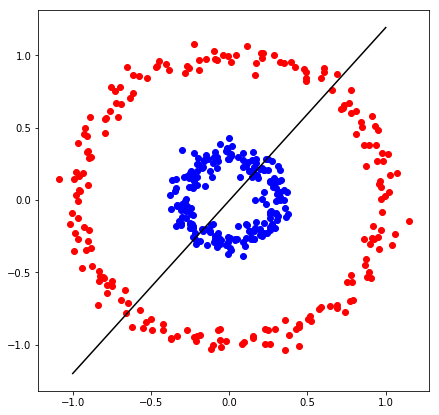

In [14]:
plt.show()

## Se podría transformar el dato a una dimensión superior

Por ejemplo adicionando una componente más que hiciera los datos facilmente separable, i.e. :

(a,b) -> (a,b,$e^{-(a+b)^2}$)

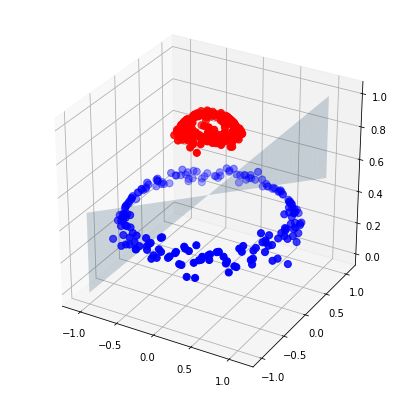

array([[ 0.        ,  0.5       ],
       [ 0.02040816,  0.5       ],
       [ 0.04081633,  0.5       ],
       [ 0.06122449,  0.5       ],
       [ 0.08163265,  0.5       ],
       [ 0.10204082,  0.5       ],
       [ 0.12244898,  0.5       ],
       [ 0.14285714,  0.5       ],
       [ 0.16326531,  0.5       ],
       [ 0.18367347,  0.5       ],
       [ 0.20408163,  0.5       ],
       [ 0.2244898 ,  0.5       ],
       [ 0.24489796,  0.5       ],
       [ 0.26530612,  0.5       ],
       [ 0.28571429,  0.5       ],
       [ 0.30612245,  0.5       ],
       [ 0.32653061,  0.5       ],
       [ 0.34693878,  0.5       ],
       [ 0.36734694,  0.5       ],
       [ 0.3877551 ,  0.5       ],
       [ 0.40816327,  0.5       ],
       [ 0.42857143,  0.5       ],
       [ 0.44897959,  0.5       ],
       [ 0.46938776,  0.5       ],
       [ 0.48979592,  0.5       ],
       [ 0.51020408,  0.5       ],
       [ 0.53061224,  0.5       ],
       [ 0.55102041,  0.5       ],
       [ 0.57142857,

In [100]:
plt.figure(figsize=(7,7))
ax = plt.subplot(projection='3d')
xx1 = np.reshape((np.linspace(-1, 1)), (50,1))
zz = np.concatenate((np.reshape((np.linspace(0, 1)), (50,1)),np.ones((50,1))*0.5), axis=1)
ax.scatter3D(Z[:, 0], Z[:, 1], Z[:,2], c=y, s=50, cmap='bwr')
ax.plot_surface(xx1, xx1, zz, alpha=0.2)
plt.show()
zz

### Cargamos y Normalizamos los datos

In [3]:
# Aqui importamos los datos que vamos a clasificar
mnist = fetch_mldata('MNIST original')

# Aqui cargamos nuestros ejemplos en X, el target en y. Nuestro objetivo con
# Machine Learning es aprender la función f(X) que genera y.
X, y = mnist["data"], mnist["target"]

In [4]:
# En esta sección separamos el dataset en 2 partes: el training set y test set
# utilizamos la función train_test_split para que los set sean "estratificados
# Como el clasificador SVM lleva bastante tiempo, utilizaremos solo parte del dataset
X_train_o, X_test_o, y_train, y_test = train_test_split(X, y, train_size=0.1, test_size=0.015, random_state=42)

In [5]:
# Antes de enviar los datos al modelo, hacemos una adaptación de los datos para normalizarlos
# Por normalización en este contexto la idea es remover la media de cada "feature"
# (i.e. centrar en zero) y dividir por la "variance", es decir hacer que los datos estén entre
# 0 y 1.

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_o)
X_test = scaler.transform(X_test_o)


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# SVM con kernel lineal

In [14]:
# Creamos el modelo
svc_clf = LinearSVC(random_state=42)
# Hacemos fit del modelo al dato
%time svc_clf.fit(X_train, y_train)

Wall time: 18.3 s


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)

In [15]:
# Medimos el rendimiento.
%time train_score = svc_clf.score(X_train, y_train)
print("Rendimiento en el dataset de training: %.4f" % train_score)
%time score = svc_clf.score(X_test, y_test)
print("Rendimiento en el dataset de pruebas: %.4f" % score)

Wall time: 19 ms
Rendimiento en el dataset de training: 0.9891
Wall time: 3.01 ms
Rendimiento en el dataset de pruebas: 0.8352


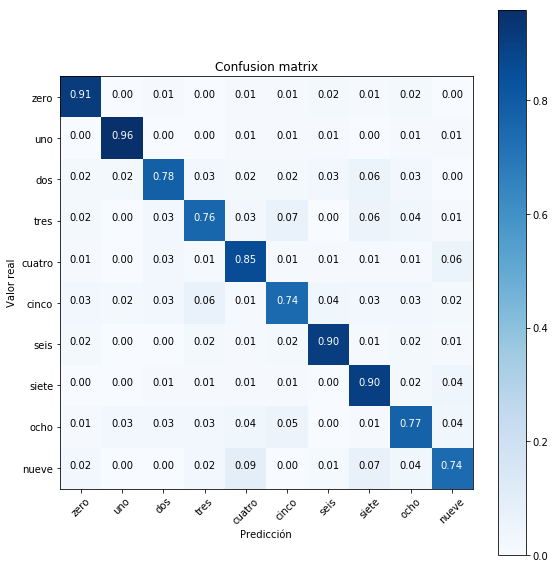

In [16]:
# La confusion matrix nos presenta una información sumaria de la precisión y del recall
cm=confusion_matrix(y_test, svc_clf.predict(X_test))
plt.figure(figsize=(8,8))
plot_confusion_matrix(cm, classes=["zero","uno","dos","tres","cuatro","cinco","seis","siete","ocho","nueve"], normalize=True);

# SVM con kernel lineal

In [17]:
# Creamos el modelo
svc_clf = SVC(kernel='linear', max_iter=1000, probability=True, random_state=42)
# Hacemos fit del modelo al dato
%time svc_clf.fit(X_train, y_train)

Wall time: 54.1 s


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=1000, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
# Medimos el rendimiento.
%time train_score = svc_clf.score(X_train, y_train)
print("Rendimiento en el dataset de training: %.4f" % train_score)
%time score = svc_clf.score(X_test, y_test)
print("Rendimiento en el dataset de pruebas: %.4f" % score)

Wall time: 17 s
Rendimiento en el dataset de training: 0.9997
Wall time: 2.5 s
Rendimiento en el dataset de pruebas: 0.8933


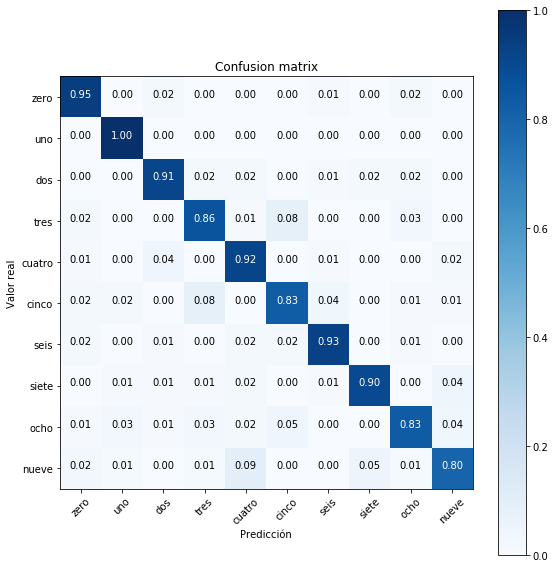

In [12]:
# La confusion matrix nos presenta una información sumaria de la precisión y del recall
cm=confusion_matrix(y_test, svc_clf.predict(X_test))
plt.figure(figsize=(8,8))
plot_confusion_matrix(cm, classes=["zero","uno","dos","tres","cuatro","cinco","seis","siete","ocho","nueve"], normalize=True);

# SVM con kernel RBF

Esta versión utiliza como kernel um "Gaussian" RBF (Radial Basis Function)

In [6]:
# Creamos el modelo
svc_clf = SVC(kernel='rbf', probability=True, random_state=42)
# Hacemos fit del modelo al dato
%time svc_clf.fit(X_train, y_train)


Wall time: 2min 12s


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
# Medimos el rendimiento.
%time train_score = svc_clf.score(X_train, y_train)
print("Rendimiento en el dataset de training: %.4f" % train_score)
%time score = svc_clf.score(X_test, y_test)
print("Rendimiento en el dataset de pruebas: %.4f" % score)

Wall time: 32.2 s
Rendimiento en el dataset de training: 0.9796
Wall time: 5.46 s
Rendimiento en el dataset de pruebas: 0.9362


In [8]:
# Esta función esta adaptada de la documentación del Scikit-Learn para presentar
# la matrix de "confusión" de forma más visual
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')
        

    #print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel("Valor real")
    plt.xlabel("Predicción")
    plt.show()


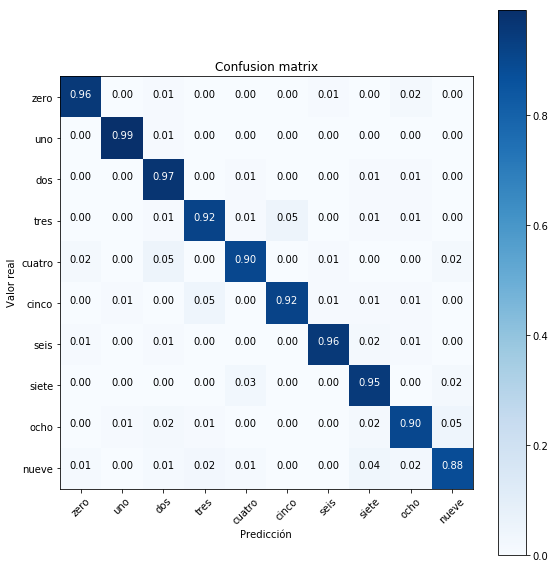

In [9]:
# La confusion matrix nos presenta una información sumaria de la precisión y del recall
cm=confusion_matrix(y_test, svc_clf.predict(X_test))
plt.figure(figsize=(8,8))
plot_confusion_matrix(cm, classes=["zero","uno","dos","tres","cuatro","cinco","seis","siete","ocho","nueve"], normalize=True);